In [22]:
#pip install meshlabxml

In [23]:
#pip install open3d

In [24]:
#pip install Pillow

In [43]:
import numpy as np
import cv2 as cv
import os
import glob
import open3d as op3
from tqdm import tqdm
from matplotlib import pyplot as plt

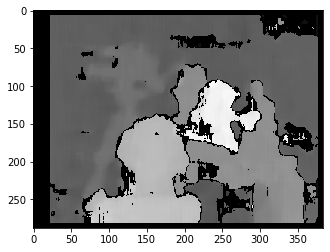

In [26]:

img_R = cv.imread('./imagenes/ImgR.jpeg',0)
img_L = cv.imread('./imagenes/ImgL.jpeg',0)
stereo = cv.StereoBM_create(numDisparities=16, blockSize=15)
disparity = stereo.compute(img_L,img_R)
plt.imshow(disparity,'gray')
plt.show()

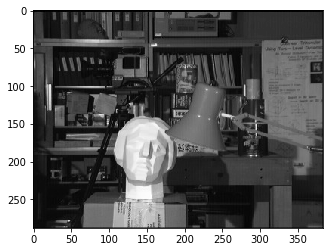

In [27]:
plt.imshow(img_R,'gray')
plt.show()

In [28]:
ret = np.load('./camera_params/ret.npy')
K = np.load('./camera_params/K.npy')
dist = np.load('./camera_params/dist.npy')
focal_length = np.load('./camera_params/FocalLength.npy')
h,w = img_L.shape[:2]

In [29]:
h,w

(288, 384)

In [30]:
focal_length

array(3.99)

In [31]:
dist

array([[ 0.21977968, -1.19558502,  0.00243337, -0.00432391,  1.77534627]])

In [32]:
K

array([[3.30372598e+03, 0.00000000e+00, 1.48216720e+03],
       [0.00000000e+00, 3.39642612e+03, 1.98711945e+03],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

# Camara matrix

In [33]:
def create_output(vertices, colors, filename):
	colors = colors.reshape(-1,3)
	vertices = np.hstack([vertices.reshape(-1,3),colors])

	ply_header = '''ply
		format ascii 1.0
		element vertex %(vert_num)d
		property float x
		property float y
		property float z
		property uchar red
		property uchar green
		property uchar blue
		end_header
		'''
	with open(filename, 'w') as f:
		f.write(ply_header %dict(vert_num=len(vertices)))
		np.savetxt(f,vertices,'%f %f %f %d %d %d')

In [41]:
h,w = img_L.shape[:2]

Q = np.float32([[1,0,0,0],
                 [0,-1,0,0],
                 [0,0,focal_length*0.05,0],
                 [0,0,0,1]])
points_3D = cv.reprojectImageTo3D(disparity, Q)
img_color = cv.imread('./imagenes/ImgL.jpeg')
colors = cv.cvtColor(img_color, cv.COLOR_BGR2RGB)
mask_map = disparity > disparity.min()
output_points = points_3D[mask_map]
output_colors = colors[mask_map]
output_file = 'reconstructed.ply'
create_output(output_points, output_colors, output_file)

In [42]:
pcd = op3.io.read_point_cloud("reconstructed.ply")
op3.visualization.draw_geometries([pcd])